In [281]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Import Data



In [282]:
# Reading the data
# file path may vary
rawData = pd.read_csv("US_youtube_trending_data.csv")

# Read json
Data_json = pd.read_json("US_category_id.json")

## Display Data

In [283]:
# Print first 5 rows of data'
rawData.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [284]:
# Displying the data type
rawData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152390 entries, 0 to 152389
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           152390 non-null  object
 1   title              152390 non-null  object
 2   publishedAt        152390 non-null  object
 3   channelId          152390 non-null  object
 4   channelTitle       152390 non-null  object
 5   categoryId         152390 non-null  int64 
 6   trending_date      152390 non-null  object
 7   tags               152390 non-null  object
 8   view_count         152390 non-null  int64 
 9   likes              152390 non-null  int64 
 10  dislikes           152390 non-null  int64 
 11  comment_count      152390 non-null  int64 
 12  thumbnail_link     152390 non-null  object
 13  comments_disabled  152390 non-null  bool  
 14  ratings_disabled   152390 non-null  bool  
 15  description        148654 non-null  object
dtypes: bool(2), int64(5)

## Filtering of Data


In [285]:
# Filter out the ununnecessary data
rawData = rawData.drop(['thumbnail_link','comments_disabled','ratings_disabled'], axis=1)

In [286]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152390 entries, 0 to 152389
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   video_id       152390 non-null  object
 1   title          152390 non-null  object
 2   publishedAt    152390 non-null  object
 3   channelId      152390 non-null  object
 4   channelTitle   152390 non-null  object
 5   categoryId     152390 non-null  int64 
 6   trending_date  152390 non-null  object
 7   tags           152390 non-null  object
 8   view_count     152390 non-null  int64 
 9   likes          152390 non-null  int64 
 10  dislikes       152390 non-null  int64 
 11  comment_count  152390 non-null  int64 
 12  description    148654 non-null  object
dtypes: int64(5), object(8)
memory usage: 15.1+ MB


In [287]:
# Create a Dictionary from json file to provide a category name
category_dict = {}
for i in Data_json['items']:
    category_dict[i['id']] = i['snippet']['title']

# Insert Category Name in the data colum
def insert_category(x):
    if str(x) in category_dict:
        return category_dict[str(x)]
rawData['category'] = rawData['categoryId'].apply(insert_category) #to match the categoryId with the category name


In [288]:
# Changing the Date and Time Format
rawData['trending_date']=pd.to_datetime(rawData['trending_date'],format='%Y-%m-%dT%H:%M:%SZ')
rawData['publishedAt']=pd.to_datetime(rawData['publishedAt'],format='%Y-%m-%dT%H:%M:%SZ')

In [289]:
rawData.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,category
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...,Howto & Style


## Find the most frequent type of video base on the cateogry

###

In [290]:
# Group the category and find the total count of Video that tag to the category

FrequentType=rawData.groupby(['category']).count().sort_values('video_id',ascending=False).loc[:,'video_id']

# Set into a new colum
FrequentType=FrequentType.reset_index()

# Remove category "Entertainment" because "Entertainment" is very vague or generic for category
# index 0 is entertainment category hence drop index[0]
FrequentType=FrequentType.drop(FrequentType.index[0])


FrequentType




,category,video_id
1,Gaming,29288
2,Music,25717
3,Sports,16136
4,People & Blogs,13524
5,Comedy,8360
6,Film & Animation,6062
7,News & Politics,5705
8,Science & Technology,4697
9,Howto & Style,4492
10,Education,3617


## Most frequent type of video Data

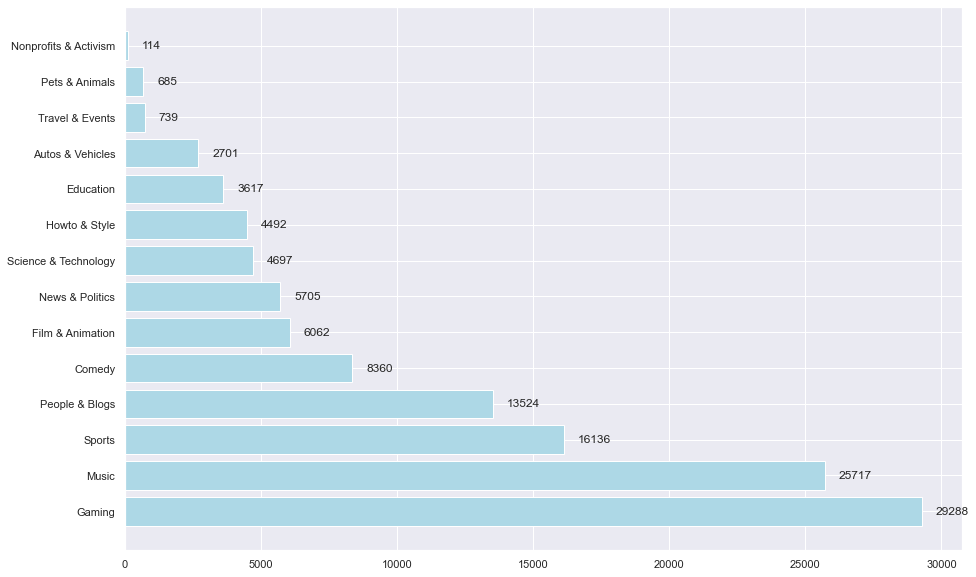

In [291]:
x= FrequentType.category
y= FrequentType.video_id
sns.set(style="darkgrid")

# Figure size
plt.figure(figsize=(15,10))


# Plot Horizontal bar chart
bar = plt.barh(x,y, fc="lightblue")

# Print out the value into the Horizontal bar chart
# label_type="edge" refer to the positionning of the value label
plt.bar_label(bar, labels=FrequentType.video_id, label_type='edge', padding=14)

plt.show()

## Filter to gaming category
####

In [292]:
# Filter the category to Gaming snice our focus is on Gaming
gamingData = rawData[rawData['category']==('Gaming')]

In [293]:
gamingData.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,category
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",Gaming
12,I6hswz4rIrU,Rainbow Six Siege: Operation Shadow Legacy Rev...,2020-08-11 17:13:53,UCBMvc6jvuTxH6TNo9ThpYjg,Ubisoft North America,20,2020-08-12,R6|R6S|Siege|New Siege|New Operators|New Ops|G...,320872,14288,774,2085,“Prepare. Execute. Vanish”Sam Fisher joins Tea...,Gaming
71,xTpr7piQu2M,FUT 21 | Official Trailer,2020-08-10 15:00:08,UCoyaxd5LQSuP4ChkxK0pnZQ,EA SPORTS FIFA,20,2020-08-12,Fifa|fifa 21|fifa21|fifa 21 trailer|fifa 21 ne...,1213314,64247,7181,5438,"Play with friends, customise your stadium, and...",Gaming
80,AG9qDVXEemc,CASH NASTY MADE A MISTAKE CHALLENGING ME TO TH...,2020-08-10 17:57:08,UCVC5-Y6ez4sk3mtbUmN-SUQ,Agent 00,20,2020-08-12,agent 00|cashnasty|1v1 basketball,480485,30207,391,2967,Came in there with one mission. Win the 1v1 vs...,Gaming
101,ysdw7cmigZM,"Game Theory: Minecraft, Stop Using Diamonds!",2020-08-08 18:05:14,UCo_IB5145EVNcf8hw1Kku7w,The Game Theorists,20,2020-08-12,minecraft|minecraft theory|minecraft diamonds|...,2657891,154064,6509,21993,Thanks Honey for sponsoring! Get the best dea...,Gaming


## To identify how many videos under the gaming cetegory is posted in a year

####


<AxesSubplot:title={'center':'Total Video in a year'}, xlabel='publishedAt', ylabel='Total_Vid'>

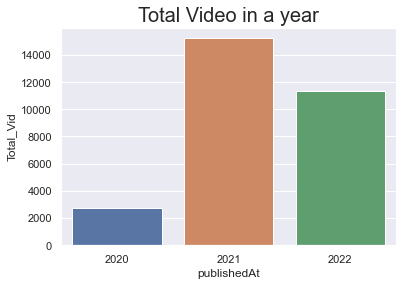

In [294]:
# video publish in a year

# Extract publishedAt to respective years to identify how many videos under the gaming cetegory is posted in a year
publish = gamingData['publishedAt'].dt.year.value_counts().reset_index()

# Rename the colums to the correct names
publish = publish.rename(columns={'index': 'publishedAt', 'publishedAt': 'Total_Vid'})


# plot bar chart
plt.title('Total Video in a year', fontsize=20)
sns.barplot(x='publishedAt', y='Total_Vid', data=publish)





In [295]:
# Split video base on the date published date
gamingData_2020 = gamingData[gamingData['publishedAt'].dt.year==2020]
gamingData_2021 = gamingData[gamingData['publishedAt'].dt.year==2021]
gamingData_2022 = gamingData[gamingData['publishedAt'].dt.year==2022]



## Use heatmap to find the correlation

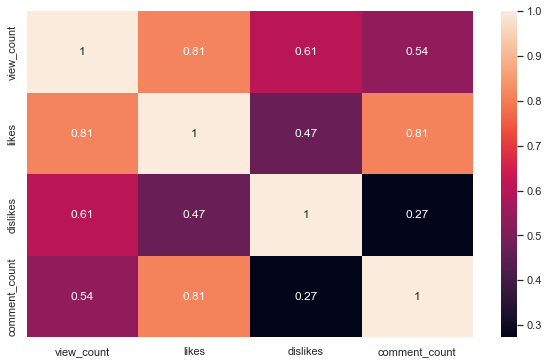

In [322]:
heatmap_stats = gamingData[["view_count", "likes", "dislikes", "comment_count"]]

# Set figure size with matplotlib
plt.figure(figsize=(10,6))


 
# Create heatmap
#heatmap_stats.corr(),annot=True is to display the value how strong the relationship is
sns.heatmap(heatmap_stats.corr(),annot=True)

# Display the plot
plt.show()

## Use scatter plot to find the correlaction is true or not

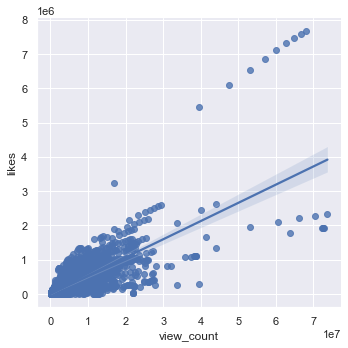

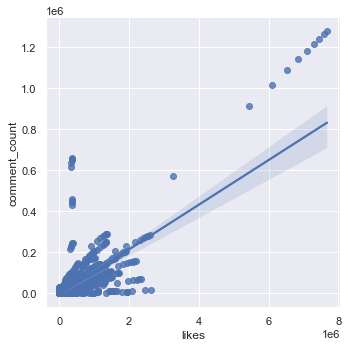

In [320]:
# Create scatter plot
sns.lmplot(x='view_count',y='likes', data=gamingData)
sns.lmplot(x='likes',y='comment_count', data=gamingData)


## Find the most and lowest 15 channelTitle base one view count, likes, dislikes and comment count

####

#### To find out top 15 channel in 2020

In [296]:
# Remove duplicated name in channeltitle 
gamingData_2020 = gamingData_2020.drop_duplicates(['channelTitle'])

# To find top 15 higest view_count, likes, dislikes and comment_count
gamingData_2020.nlargest(n=15, columns=['view_count','likes','dislikes','comment_count'])




,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,category
5406,ME7qwm7oerQ,Brawl Stars: Brawl Talk - Welcome to Starr Par...,2020-09-07 08:00:10,UCooVYzDxdwTtGYAkcPmOgOw,Brawl Stars,20,2020-09-08,brawl stars|mobile game|mobile strategy game|m...,14445277,733122,22746,71400,Download NOW!! ►► https://supr.cl/playbrawlBe ...,Gaming
128,QsUfsZzxi9c,"Whatever You Build, I'll Pay For!",2020-08-06 17:00:23,UCIPPMRA040LQr5QPyJEbmXA,MrBeast Gaming,20,2020-08-12,[None],13073796,1643982,16286,97749,We have a giant area of land and whatever you ...,Gaming
11602,YTZ-GZPTND8,"AMONG US, but with 99 IMPOSTORS",2020-10-09 00:16:14,UClarhNTgYk5wuztsunOx2Cw,The Pixel Kingdom,20,2020-10-09,among us|100 player|99 player|hack|cheat|multi...,10500277,616835,8736,20600,Mankind was raised on The Skeld... it was neve...,Gaming
19598,R7klyFU_6xM,Minecraft Survivalist VS 3 Hitmen,2020-11-18 17:00:10,UCTkXRDQl0luXxVQrRQvWS6w,Dream,20,2020-11-19,Dream Minecraft|dream Minecraft youtube|minecr...,7940220,921800,7047,92163,Minecraft Survivalist VS 3 Hitmen. This might ...,Gaming
5804,CQta9Hq28rI,"Minecraft, But I'm Not Colorblind Anymore...",2020-09-09 08:51:13,UCA2tt9GSU2sl8rAqjlLR3mQ,GeorgeNotFound,20,2020-09-10,minecraft|challenge|Minecraft but|Minecraft Bu...,7512008,801005,6864,78454,"Minecraft, But I'm Not Colorblind Anymore...I ...",Gaming
3205,RkID8_gnTxw,"K/DA - THE BADDEST ft. (G)I-DLE, Bea Miller, W...",2020-08-27 19:00:09,UC2t5bjwHdUX4vM2g8TRDq5g,League of Legends,20,2020-08-28,Riot Games|Riot|League of Legends|League|LoL|M...,7027647,669490,22912,38264,Follow @KDA_MUSIC on Twitter and Instagram for...,Gaming
122,z9i14AlzWL0,VIDEOS that are truly funny,2020-08-09 00:54:46,UCw1SQ6QRRtfAhrN_cjkrOgA,LazarBeam,20,2020-08-12,[None],6453572,437366,4968,32225,haha videos make me laugh very funny very cool...,Gaming
20439,xl125ZovpAA,Reviewing Memes With KSI,2020-11-22 16:12:28,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,20,2020-11-24,SATIRE,6308692,829465,4922,58176,KSI's channel: https://www.youtube.com/user/KS...,Gaming
25599,lFsumKiRVRs,Mom Says Girls Can't Play Video Games ft SSSni...,2020-12-19 19:42:02,UCpB959t8iPrxQWj7G6n0ctQ,SSSniperWolf,20,2020-12-21,sssniperwolf|sniper wolf|reacting|reaction|funny,5651433,324346,5397,53129,Mom Says Girls Can't Play Video Games ft SSSni...,Gaming
12420,l2b02sUKf0I,Oculus Quest 2 | Break Free,2020-10-13 00:23:30,UC766vkQw0Mz3VtXX5XvXxGQ,Oculus,20,2020-10-13,oculus quest 2|oculus|oculus quest|oculus rift...,5427449,7578,3314,1245,Why play the same old way when you can play fo...,Gaming


#### create charts base on the top15 channel in 2020

c:\Users\formy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\formy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\formy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12514 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\formy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\formy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\formy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24335 missing from c

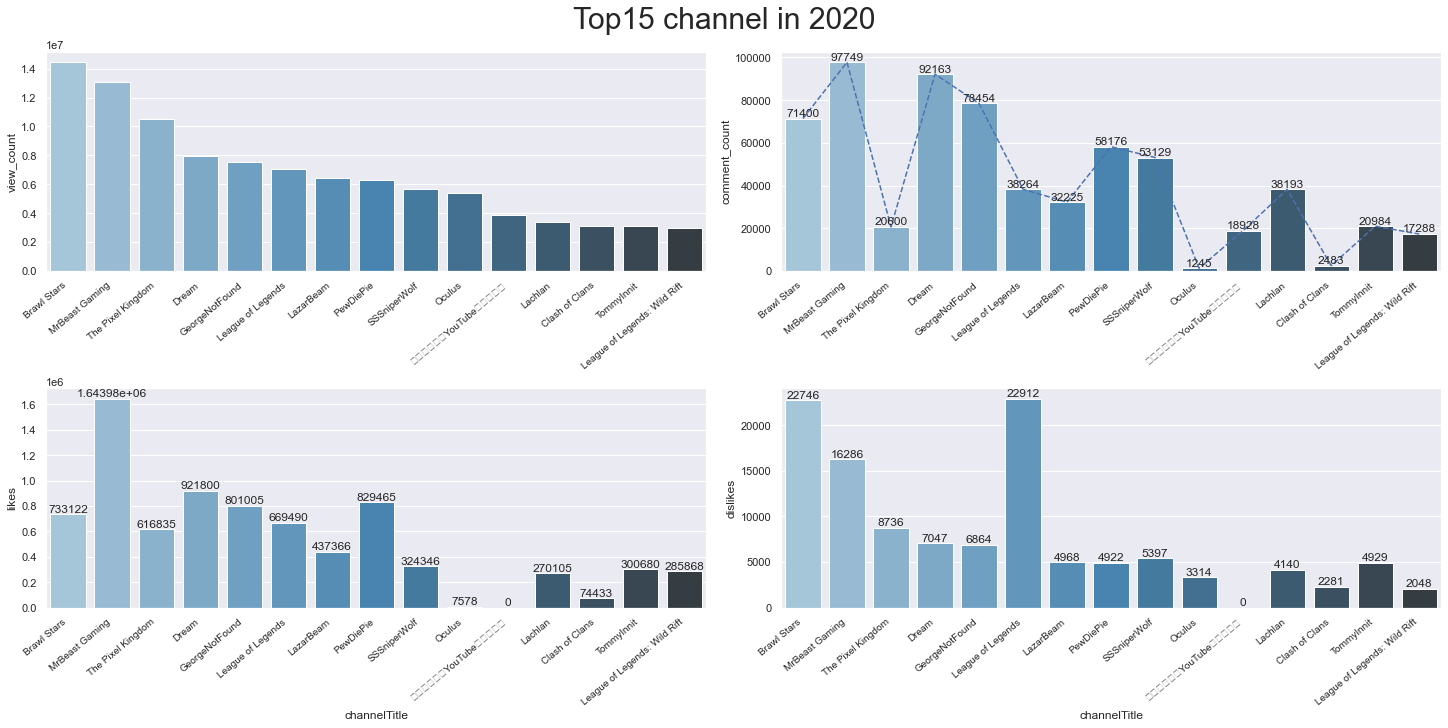

In [297]:
# Filter top15 channel base on higest view_count, likes, dislikes and comment_count
top15_2020 = gamingData_2020.nlargest(n=15, columns=['view_count','likes','dislikes','comment_count'])

channel_title = top15_2020.channelTitle
likes = top15_2020.likes
dislikes = top15_2020.dislikes
comments = top15_2020.comment_count
views = top15_2020.view_count

# Set the chart size and constrained_layout=True to prevent chrts overlapping
plt.figure(figsize=(20,10),constrained_layout=True)
# Main title 
plt.suptitle('Top15 channel in 2020', fontsize=30)





# plt.subplot(numbers of rows=, numbers of columns=, which chart to plot) is to create numbers of row and colums of the subplot 

# create first chart 
plt.subplot(2,2,1) 

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax1 = sns.barplot(x=channel_title, y=views, palette=("Blues_d"))

# remove the x axis title
ax1.set(xlabel=None)




# create second chart
plt.subplot(2,2,2)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")


# create line chart
# 'b-' b is blue and -- is the dotted line
plt.plot(channel_title, comments, 'b--')

# create bar chart
ax2=sns.barplot(x=channel_title, y =comments,palette=("Blues_d"))

# remove the x axis title
ax2.set(xlabel=None)

# print out the value into the bar chart
for i in ax2.containers:
    ax2.bar_label(i)




# create third chart
plt.subplot(2,2,3)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax3=sns.barplot(x=channel_title, y =likes, palette=("Blues_d"))

# print out the value into the bar chart
for i in ax3.containers:
    ax3.bar_label(i)




#create fourth chart
plt.subplot(2,2,4)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax4=sns.barplot(x=channel_title, y =dislikes, palette=("Blues_d"))

# print out the value into the bar chart
for i in ax4.containers:
    ax4.bar_label(i)

#### create charts base on the lowest 15 channel in 2020

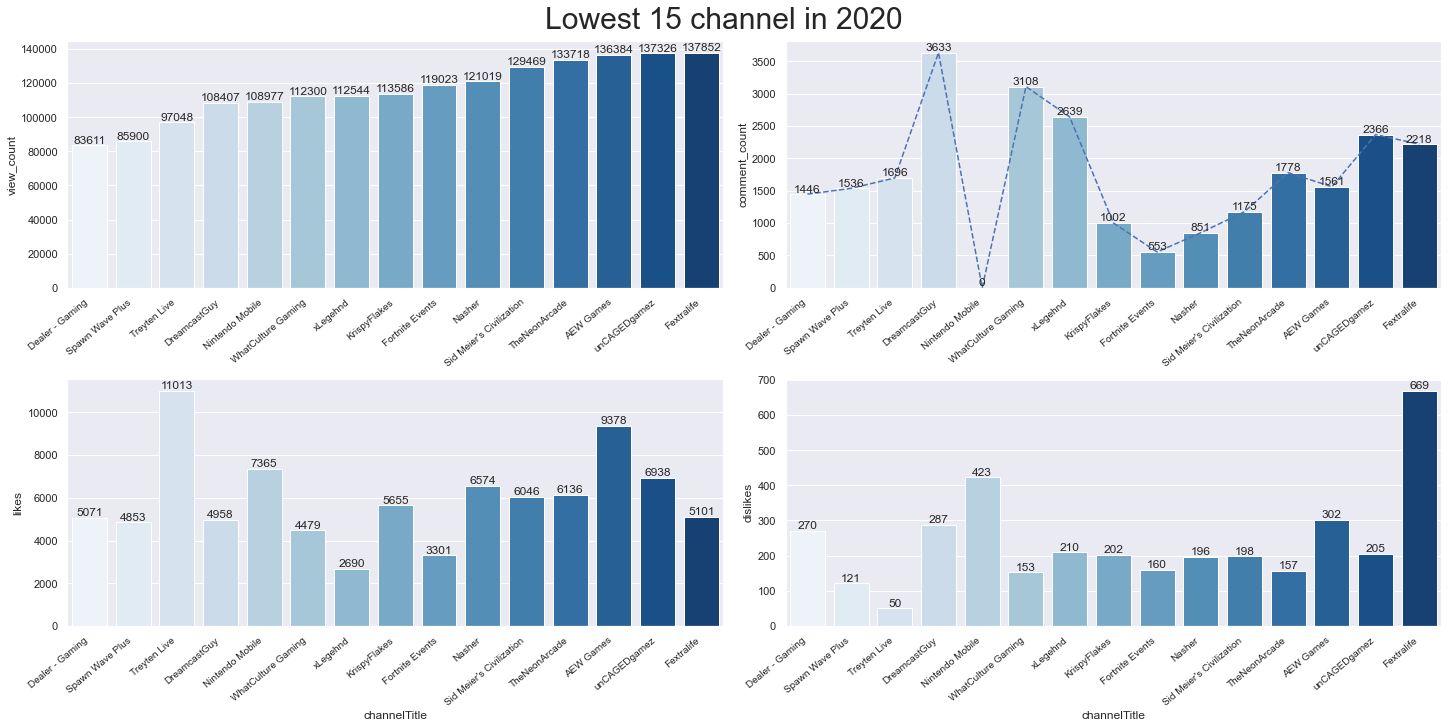

In [298]:
# Filter lowest 15 channel base on lowest view_count, likes, dislikes and comment_count
lowest15_2020 = gamingData_2020.nsmallest(n=15, columns=['view_count','likes','dislikes','comment_count'])

channel_title = lowest15_2020.channelTitle
likes = lowest15_2020.likes
dislikes = lowest15_2020.dislikes
comments = lowest15_2020.comment_count
views = lowest15_2020.view_count

# Set the chart size and constrained_layout=True to prevent charts overlapping
plt.figure(figsize=(20,10),constrained_layout=True)
# Main title 
plt.suptitle('Lowest 15 channel in 2020', fontsize=30)




# plt.subplot(numbers of rows=, numbers of columns=, which chart to plot) is to create numbers of row and colums of the subplot 

# create first chart
plt.subplot(2,2,1)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax1=sns.barplot(x=channel_title, y=views,palette=("Blues"))

# remove the x axis title
ax1.set(xlabel=None)

# print out the value into the bar chart
for i in ax1.containers:
    ax1.bar_label(i)




# create second chart
plt.subplot(2,2,2)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create line chart
# 'b-' b is blue and -- is the dotted line
plt.plot(channel_title, comments, 'b--')

# create bar chart
ax2=sns.barplot(x=channel_title, y =comments,palette=("Blues"))

# remove the x axis title
ax2.set(xlabel=None)

# print out the value into the bar chart
for i in ax2.containers:
    ax2.bar_label(i)




# create third chart
plt.subplot(2,2,3)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax3=sns.barplot(x=channel_title, y =likes,palette=("Blues"))

# print out the value into the bar chart
for i in ax3.containers:
    ax3.bar_label(i)




#create fourth chart
plt.subplot(2,2,4)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax4=sns.barplot(x=channel_title, y =dislikes,palette=("Blues"))

# print out the value into the bar chart
for i in ax4.containers:
    ax4.bar_label(i)

#### To find out top 15 channel in 2021

In [299]:
# Remove duplicated name in channeltitle 
gamingData_2021 = gamingData_2021.drop_duplicates(['channelTitle'])

# To find top 15 higest view_count, likes, dislikes and comment_count
gamingData_2021.nlargest(n=15, columns=['view_count','likes','dislikes','comment_count'])



,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,category
34994,a8ds6SnOGow,Minecraft Speedrunner VS 4 Hunters GRAND FINALE,2021-02-05 21:00:11,UCTkXRDQl0luXxVQrRQvWS6w,Dream,20,2021-02-07,Dream Minecraft|dream Minecraft youtube|minecr...,13830767,1508702,15500,170418,Minecraft Speedrunner VS 4 Hunters GRAND FINAL...,Gaming
56264,Q8WbLsOkGrE,Manifest but Every Turn a Different Cover is U...,2021-05-25 14:29:02,UC4rwJYVeDHxGKnFDhHz88ZQ,Blantados,20,2021-05-30,friday night funkin|manifest but every turn a ...,11601648,195947,4951,14841,Manifest but Every Turn a Different Cover is U...,Gaming
32199,2f9TU-F214c,"Brawl Stars: Brawl Talk! - Starr Force Season,...",2021-01-23 16:00:13,UCooVYzDxdwTtGYAkcPmOgOw,Brawl Stars,20,2021-01-24,brawl stars|mobile game|mobile strategy game|m...,11203292,940389,8209,90752,Download NOW!! ►► https://supr.cl/playbrawlBe ...,Gaming
28000,xN8ENrfE-TY,"If You Build a House, I'll Pay For It!",2021-01-02 19:07:38,UCIPPMRA040LQr5QPyJEbmXA,MrBeast Gaming,20,2021-01-03,[None],7316648,522548,5029,40262,"If you build the best house, I'll buy you a ho...",Gaming
60391,ASzOzrB-a9E,Battlefield 2042 Official Reveal Trailer (ft. ...,2021-06-09 15:00:14,UCvNBXWGykQrWb7kPAn5eLUQ,Battlefield,20,2021-06-10,Battlefield|Battlefield 2042|Battlefield 2045 ...,6237570,573611,10361,53994,"Play Battlefield 2042 starting October 22, 202...",Gaming
101191,-Y6K7F58ee0,Chapter 3 No Way Home,2021-12-25 23:00:00,UCZyxY8Q7xgUCXfFViWkjrSw,Ceeday,20,2021-12-27,[None],5955184,865903,0,122387,Chapter 3 No Way Home https://www.instagram.co...,Gaming
35002,VpQo2rZLT5E,Girl Gamer Gets Bullied By Kid At School ft SS...,2021-02-05 19:35:01,UCpB959t8iPrxQWj7G6n0ctQ,SSSniperWolf,20,2021-02-07,sssniperwolf|sniper wolf|reacting|reaction|fun...,5696934,304206,6062,214474,Girl Gamer Gets Bullied By Kid At School ft SS...,Gaming
57209,Iv57EFQ9mS0,Minecraft: SEND this to SOMEONE SPECIAL! #shorts,2021-05-31 12:30:02,UCapgXl5RTXwm9d5DO21jh3Q,GEVids,20,2021-06-02,minecraft|send this to your crush without cont...,5423062,338542,11656,1190,Send this to your crush without context! 🥰#min...,Gaming
30800,EUGfsx2EmAw,Minecraft’s Natural Disaster Mod Is Stupidly F...,2021-01-15 21:30:27,UC5p_l5ZeB_wGjO_yDXwiqvw,TommyInnit,20,2021-01-17,tommyinnit|minecraft|mine craft|dream|dream mi...,4813747,468353,5363,47953,"Today TommyInnit, Wilbur Soot, Philza & more h...",Gaming
42628,TC1smbjIVJI,Dark Alliance – Official Gameplay Trailer,2021-03-16 12:56:16,UCqnz6xJBdyzkQtmvdZYgdng,Dark Alliance,20,2021-03-17,dungeons & dragons|d&d|dnd|dungeons and dragon...,4132349,1975,402,347,Your Party. Their Funeral. Preorder Now – Dark...,Gaming


#### create charts base on the top15 channel in 2021 

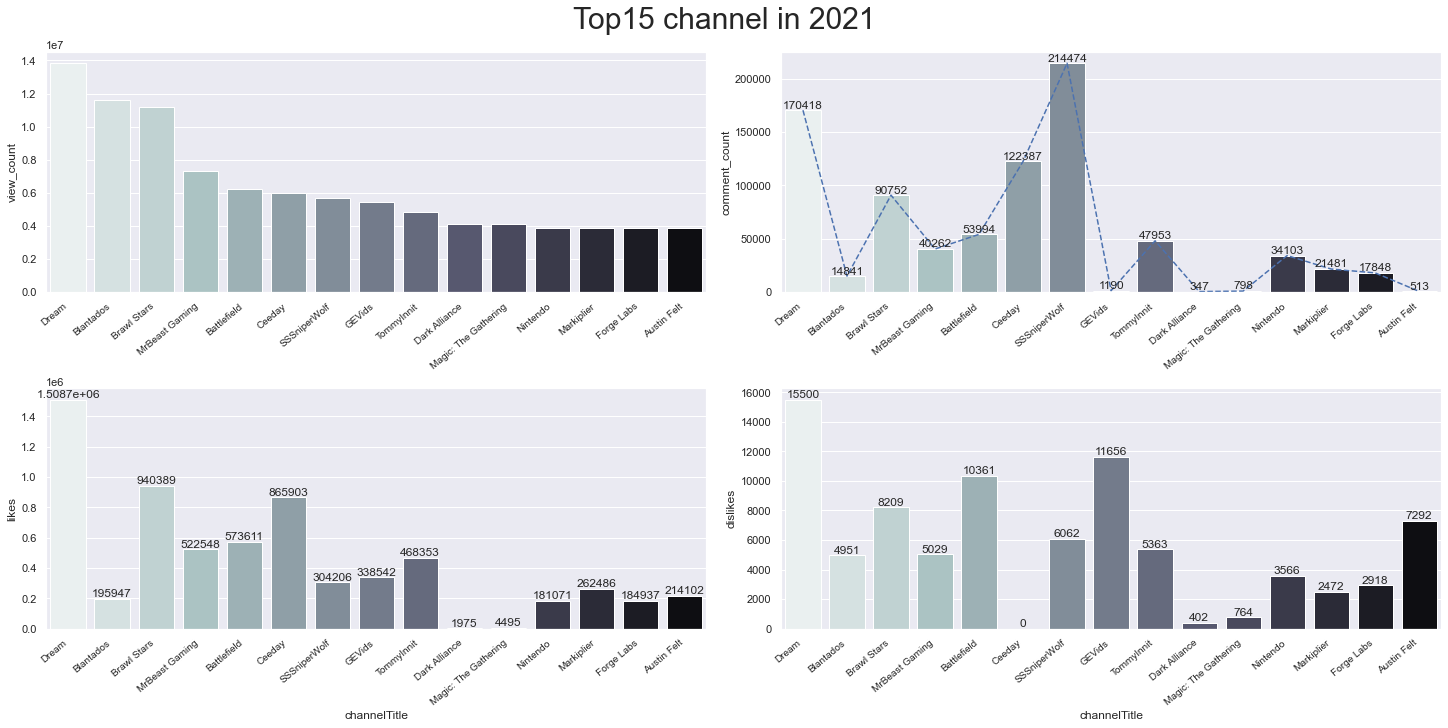

In [300]:
# Filter top15 channel base on highest view_count, likes, dislikes and comment_count
top15_2021 = gamingData_2021.nlargest(n=15, columns=['view_count','likes','dislikes','comment_count'])

channel_title = top15_2021.channelTitle
likes = top15_2021.likes
dislikes = top15_2021.dislikes
comments = top15_2021.comment_count
views = top15_2021.view_count

# Set the chart size and constrained_layout=True to prevent charts overlapping
plt.figure(figsize=(20,10),constrained_layout=True)
# Main title 
plt.suptitle('Top15 channel in 2021', fontsize=30)




# plt.subplot(numbers of rows=, numbers of columns=, which chart to plot) is to create numbers of row and colums of the subplot 

# create first chart
plt.subplot(2,2,1)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax1=sns.barplot(x=channel_title, y=views,palette=("bone_r"))

# remove the x axis title
ax1.set(xlabel=None)




# create second chart
plt.subplot(2,2,2)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create line chart
# 'b-' b is blue and -- is the dotted line
plt.plot(channel_title, comments, 'b--')

# create bar chart
ax2=sns.barplot(x=channel_title, y =comments,palette=("bone_r"))

# remove the x axis title
ax2.set(xlabel=None)

# print out the value into the bar chart
for i in ax2.containers:
    ax2.bar_label(i)




# create third chart
plt.subplot(2,2,3)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax3=sns.barplot(x=channel_title, y =likes,palette=("bone_r"))

# print out the value into the bar chart
for i in ax3.containers:
    ax3.bar_label(i)




#create fourth chart
plt.subplot(2,2,4)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax4=sns.barplot(x=channel_title, y =dislikes,palette=("bone_r"))

# print out the value into the bar chart
for i in ax4.containers:
    ax4.bar_label(i)

#### create charts base on the lowest 15 in 2021 data

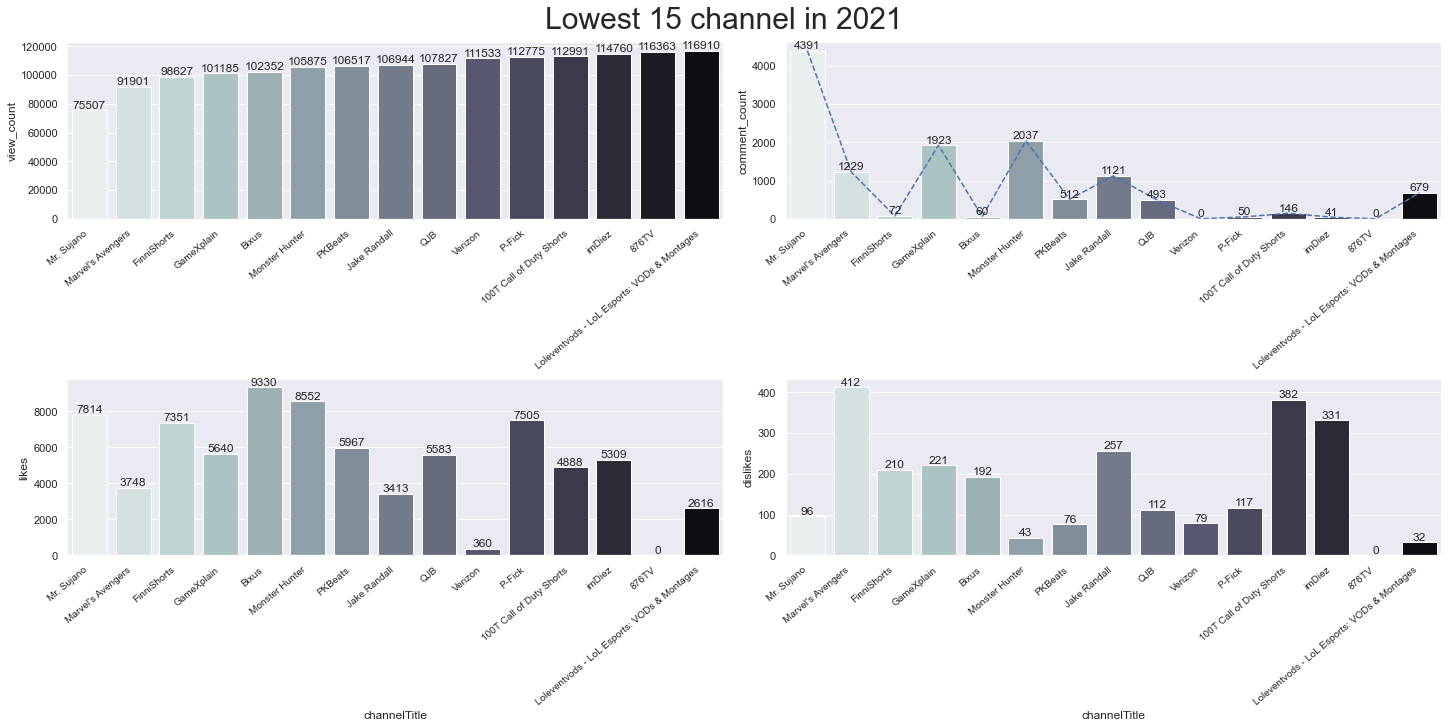

In [307]:
# Filter lowest15 channel base on lowest view_count, likes, dislikes and comment_count
lowest15_2021 = gamingData_2021.nsmallest(n=15, columns=['view_count','likes','dislikes','comment_count'])

channel_title = lowest15_2021.channelTitle
likes = lowest15_2021.likes
dislikes = lowest15_2021.dislikes
comments = lowest15_2021.comment_count
views = lowest15_2021.view_count

# Set the chart size and constrained_layout=True to prevent charts overlapping
plt.figure(figsize=(20,10),constrained_layout=True)
# Main title 
plt.suptitle('Lowest 15 channel in 2021', fontsize=30)




# plt.subplot(numbers of rows=, numbers of columns=, which chart to plot) is to create numbers of row and colums of the subplot 

# create first chart
plt.subplot(2,2,1)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax1=sns.barplot(x=channel_title, y=views,palette=("bone_r"))

# print out the value into the bar chart
for i in ax1.containers:
    ax1.bar_label(i)

# remove the x axis title
ax1.set(xlabel=None)




# create second chart
plt.subplot(2,2,2)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create line chart
# 'b-' b is blue and -- is the dotted line
plt.plot(channel_title, comments, 'b--')

# create bar chart
ax2=sns.barplot(x=channel_title, y =comments,palette=("bone_r"))

# remove the x axis title
ax2.set(xlabel=None)

# print out the value into the bar chart
for i in ax2.containers:
    ax2.bar_label(i)




# create third chart
plt.subplot(2,2,3)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax3=sns.barplot(x=channel_title, y =likes,palette=("bone_r"))

# print out the value into the bar chart
for i in ax3.containers:
    ax3.bar_label(i)




#create fourth chart
plt.subplot(2,2,4)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax4=sns.barplot(x=channel_title, y =dislikes,palette=("bone_r"))

# print out the value into the bar chart
for i in ax4.containers:
    ax4.bar_label(i)

#### To find out top 15 channel in 2022

In [302]:
# Remove duplicated name in channeltitle 
gamingData_2022 = gamingData_2022.drop_duplicates(['channelTitle'])

# To find top 15 higest view_count, likes, and comment_count
gamingData_2022.nlargest(n=15, columns=['likes','comment_count','view_count'])

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,category
111791,AelCvAXnr0M,Minecraft: Which SPIDER-MAN looked the best? 🤔...,2022-02-17 15:00:05,UCGa9YJJiR-Jec5y10GQxEPg,Twi Shorts,20,2022-02-18,twi shorts|minecraft|minecraft shorts|mcyt|min...,15080604,1112467,0,7228,Minecraft: Which SPIDER-MAN looked the best? 🤔...,Gaming
107625,M9aPQ9GqeeM,Help🙏🏻🙏🏻🙏🏻🙏🏻#shorts,2022-01-26 15:56:17,UCi-zk_MWt0Skdhm4ez_aFZw,JANNA_Sega,20,2022-01-28,[None],15217609,1077940,0,6068,NaN,Gaming
121992,C6P6hrWyidA,Minecraft 100 Floor Survival...,2022-04-09 05:15:25,UCTkXRDQl0luXxVQrRQvWS6w,Dream,20,2022-04-10,minecraft|dream|dream minecraft|minecraft chal...,3954105,415554,0,12493,Minecraft 100 Floor Survival... This is a comp...,Gaming
107993,VWNdhuV6mwA,World's Largest Challenge!,2022-01-28 19:00:24,UCIPPMRA040LQr5QPyJEbmXA,MrBeast Gaming,20,2022-01-30,[None],7062260,405220,0,17941,We made the world's largest Minecraft challeng...,Gaming
102591,8ANfAt4hJ6Y,"Game Theory: FNAF, Don't Trust Gregory (FNAF S...",2022-01-01 18:05:02,UCo_IB5145EVNcf8hw1Kku7w,The Game Theorists,20,2022-01-03,FNAF|Five Nights at Freddys|fnaf security brea...,4581231,377283,0,31908,SUBSCRIBE to NEVER miss a Theory! ► https://go...,Gaming
103593,mDYqT0_9VR4,The Call | Season 2022 Cinematic - League of L...,2022-01-07 15:06:43,UC2t5bjwHdUX4vM2g8TRDq5g,League of Legends,20,2022-01-08,Riot Games|Riot|League of Legends|League|LoL|M...,4838341,373929,0,17798,For the fallen. For the deserted. For the down...,Gaming
109202,bVm_yp7lfzo,endless chocolate lifehack,2022-02-04 11:55:53,UCVBuE-sEAikazcOOHYc0kjw,condsty,20,2022-02-05,[None],15377319,356698,0,2416,NaN,Gaming
104197,OCSfKNhe-FU,Minecraft's Funniest YouTuber Hunger Games...,2022-01-09 21:54:36,UC5p_l5ZeB_wGjO_yDXwiqvw,TommyInnit,20,2022-01-11,tommyinnit|minecraft|mine craft|dream minecraf...,2650398,285362,0,15970,"Today TommyInnit, Wilbur Soot, Ant Venom & mor...",Gaming
120794,EG_cNdlHIN8,The Minecraft VR Experience,2022-04-02 23:32:36,UCFAiFyGs6oDiF1Nf-rRJpZA,Technoblade,20,2022-04-04,Minecraft|Technoblade|Technothepig|Hypixel,1895503,284932,0,19730,10 MIL MERCH: https://technoblade.com/--------...,Gaming
113591,dnpjxeDDThw,Elden Ring is RAGE GAME OF 2022,2022-02-26 19:19:37,UCiYcA0gJzg855iSKMrX3oHg,CoryxKenshin,20,2022-02-27,elden ring|elden|ring|game|elden ring gameplay...,1795658,283347,0,70393,Elden Ring is HERE. Don't know if I'm going to...,Gaming


#### create charts base on the Top15 channel in 2022 

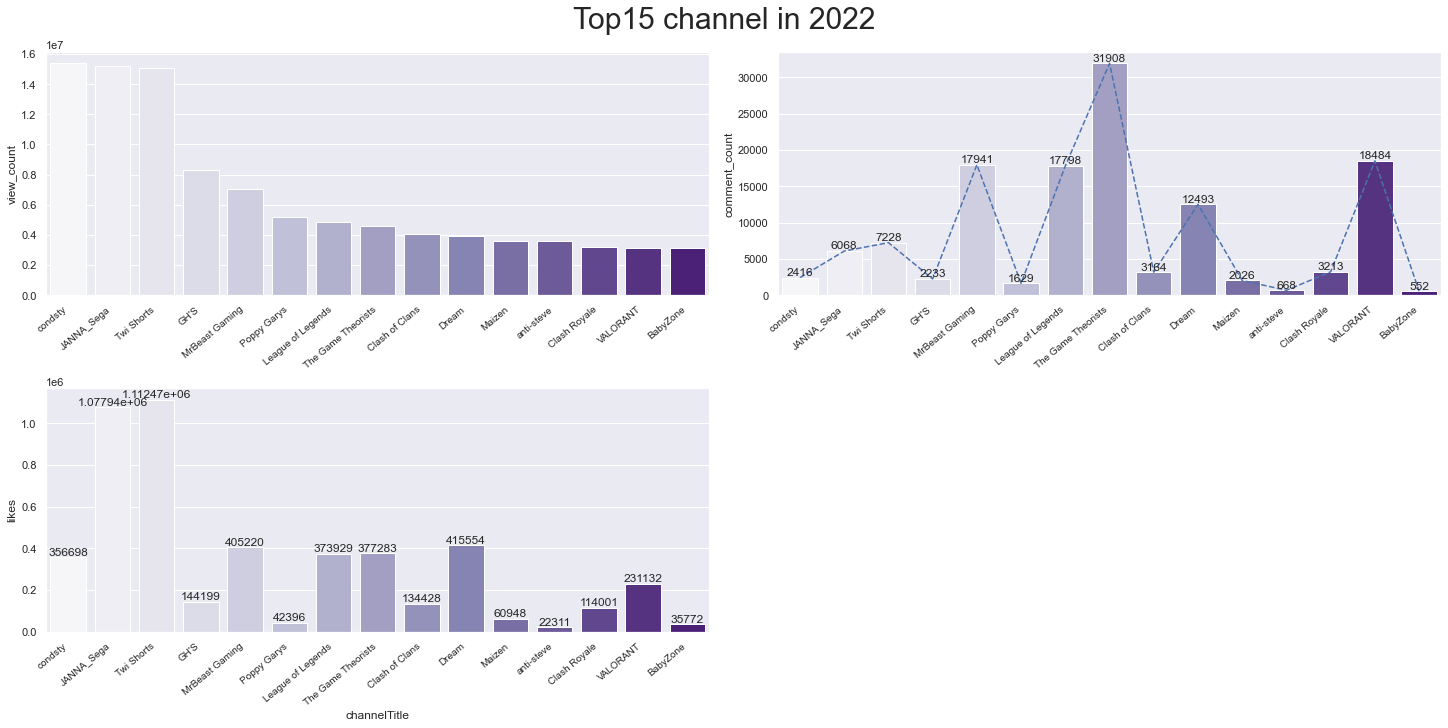

In [303]:
# Filter Top15 channel base on highest view_count, likes and comment_count
top15_2022 = gamingData_2022.nlargest(n=15, columns=['view_count','likes','comment_count'])

channel_title = top15_2022.channelTitle
likes = top15_2022.likes
dislikes = top15_2022.dislikes
comments = top15_2022.comment_count
views = top15_2022.view_count

# Set the chart size and constrained_layout=True to prevent charts overlapping
plt.figure(figsize=(20,10),constrained_layout=True)
# Main title 
plt.suptitle('Top15 channel in 2022', fontsize=30)




# plt.subplot(numbers of rows=, numbers of columns=, which chart to plot) is to create numbers of row and colums of the subplot 

# create first chart
plt.subplot(2,2,1)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax1=sns.barplot(x=channel_title, y=views,palette=("Purples"))

# remove the x axis title
ax1.set(xlabel=None)




# create second chart
plt.subplot(2,2,2)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create line chart
# 'b-' b is blue and -- is the dotted line
plt.plot(channel_title, comments, 'b--')

# create bar chart
ax2=sns.barplot(x=channel_title, y =comments,palette=("Purples"))

# remove the x axis title
ax2.set(xlabel=None)

# print out the value into the bar chart
for i in ax2.containers:
    ax2.bar_label(i)




# create third chart
plt.subplot(2,2,3)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax3=sns.barplot(x=channel_title, y =likes,palette=("Purples"))

# print out the value into the bar chart
for i in ax3.containers:
    ax3.bar_label(i)






#### create charts base on the lowest 15 in 2022

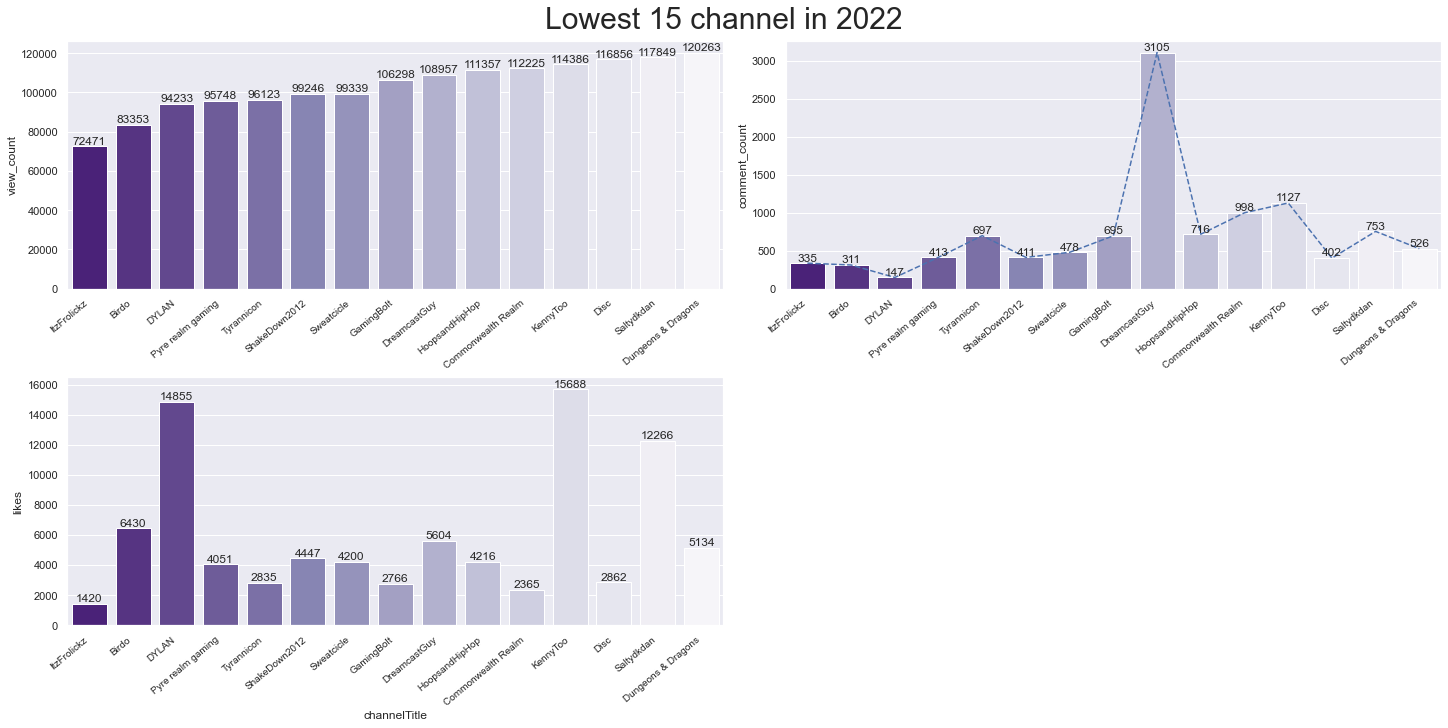

In [308]:
# Filter Lowest 15 channel base on lowest view_count, likes and comment_count
lowest15_2022 = gamingData_2022.nsmallest(n=15, columns=['view_count','likes','comment_count'])

channel_title = lowest15_2022.channelTitle
likes = lowest15_2022.likes
dislikes = lowest15_2022.dislikes
comments = lowest15_2022.comment_count
views = lowest15_2022.view_count

# Set the chart size and constrained_layout=True to prevent charts overlapping
plt.figure(figsize=(20,10),constrained_layout=True)
# Main title 
plt.suptitle('Lowest 15 channel in 2022', fontsize=30)




# plt.subplot(numbers of rows=, numbers of columns=, which chart to plot) is to create numbers of row and colums of the subplot 

# create first chart
plt.subplot(2,2,1)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax1=sns.barplot(x=channel_title, y=views,palette=("Purples_r"))

# print out the value into the bar chart
for i in ax1.containers:
    ax1.bar_label(i)

# remove the x axis title
ax1.set(xlabel=None)




# create second chart
plt.subplot(2,2,2)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create line chart
# 'b-' b is blue and -- is the dotted line
plt.plot(channel_title, comments, 'b--')

# create bar chart
ax2=sns.barplot(x=channel_title, y =comments,palette=("Purples_r"))

# remove the x axis title
ax2.set(xlabel=None)

# print out the value into the bar chart
for i in ax2.containers:
    ax2.bar_label(i)




# create third chart
plt.subplot(2,2,3)

# customize x Axis
# rotation is to rotate the x axis label(channeltile) to prevent the labels overlap each other and ha is to position the labels
plt.xticks(fontsize=10, rotation="40", ha="right")

# create bar chart
ax3=sns.barplot(x=channel_title, y =likes,palette=("Purples_r"))

# print out the value into the bar chart
for i in ax3.containers:
    ax3.bar_label(i)